**1.1 Loading the modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

**1.2. Loading the Dataset:-**

In [ ]:
data=pd.read_csv('/content/SeoulBikeData.csv',encoding= 'unicode_escape')

# **2. Data Understanding:-**

**2.1. First few rows of dataset:-**

In [ ]:
data.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**2.2. Last few rows of dataset:-**

In [ ]:
data.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**2.3. Data Type and missing value in columns:-**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**2.4. Statistical Description of dataset:-**

In [ ]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**2.5. Shape of the Dataset:-**

In [ ]:
print('Shape of the Dataset:-',end='')
data.shape

Shape of the Dataset:-

(8760, 14)

**2.6. Different columns of dataset:-**

In [ ]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Categorical:-**

In [ ]:
print('Categorical column in dataset:-')
cat=data.select_dtypes(include='object')
cat.head(3)

Categorical column in dataset:-


,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes


**Numerical:-**

In [ ]:
print('Numerical column in dataset:-')
cat=data.select_dtypes(exclude='object')
cat.head(3)

Numerical column in dataset:-


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0


**2.8 Missing Value**

In [ ]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* **There is no missing value in dataset:-**

# **3. Data Preprocessing:-**

**3.1. Treating date object to timestamp object:-**

In [ ]:
data['Date']=pd.to_datetime(data['Date'])

**3.2. Extracting date,year and month.**

In [ ]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month_name()
data['weekday']=data['Date'].dt.day_name()

**3.3. Eliminating rows with bike rental is zero.**

In [ ]:
# Taking the  dataframe where the bike rental count is not 0

data=data[data['Rented Bike Count']!=0]

In [ ]:
data['months']=data['Date'].dt.month
data['weekdays']=data['Date'].dt.weekday

**3.4. Dropping unnecessary columns:-**

In [ ]:
data.drop(['Date'],axis=1,inplace=True)

# **4. Data Visualization**

**4.1. Histogram of continuous columns:-**

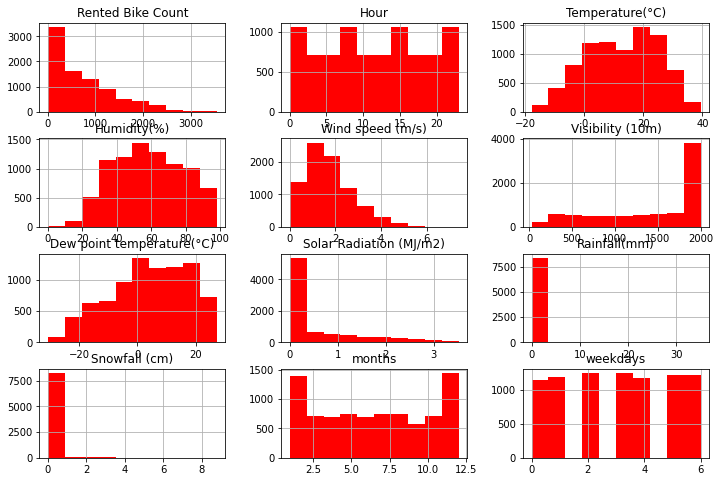

In [ ]:
cont_data=data.select_dtypes(exclude='object').drop(['year'],axis=1)
cont_data.hist(figsize=(12,8),color='red')
plt.show()

**4.2. Ecdf plot of Rented bike per year.**

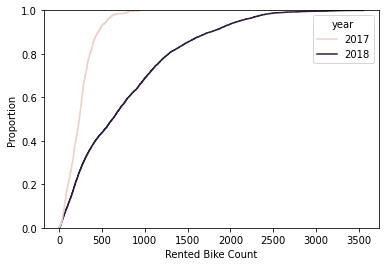

In [ ]:
sns.ecdfplot(x='Rented Bike Count',hue='year',data=data)

* Rental bike was more active in 2018 than 2017.
* Curve is definitely not normal.
* About 60% of population rented bike below 1000.

**4.3. Relation between continuous variable and Rented bike count.**

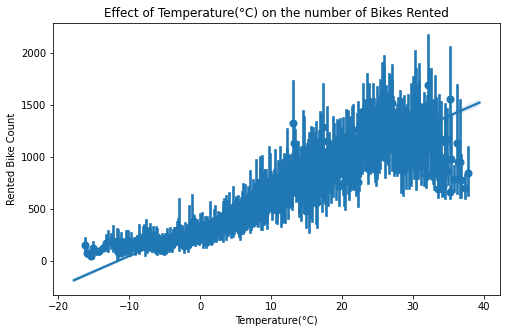

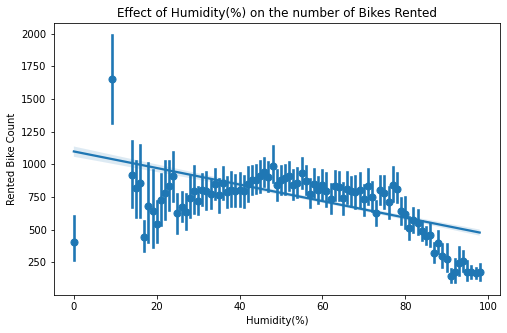

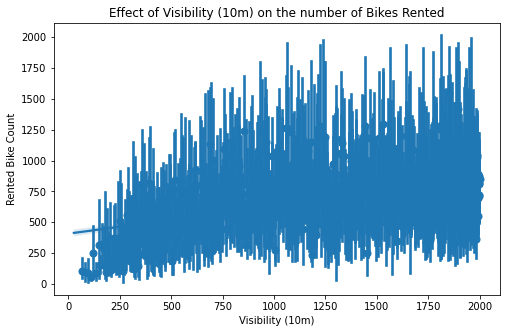

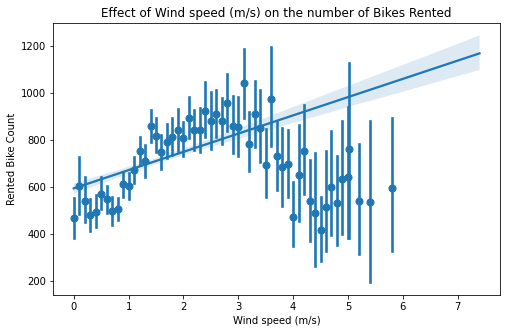

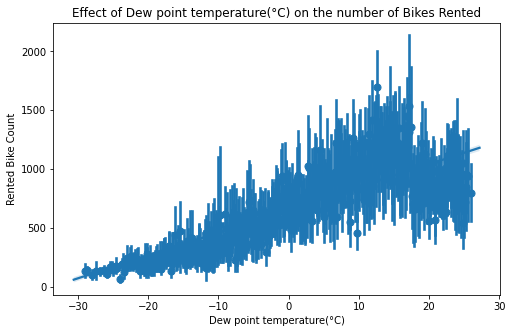

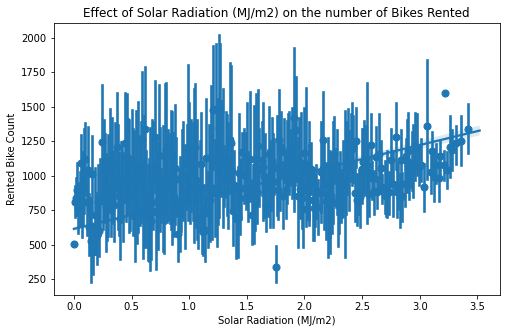

In [ ]:
col=['Temperature(°C)','Humidity(%)','Visibility (10m)','Wind speed (m/s)','Dew point temperature(°C)','Solar Radiation (MJ/m2)']

for i in col:
  plt.figure(figsize=(8,5))
  sns.regplot(x=data[i], y=data['Rented Bike Count'] ,x_bins=1000,fit_reg=True)
  plt.title('Effect of {} on the number of Bikes Rented'.format(i))
  plt.show()

**4.3. Average bikes rented each week.**

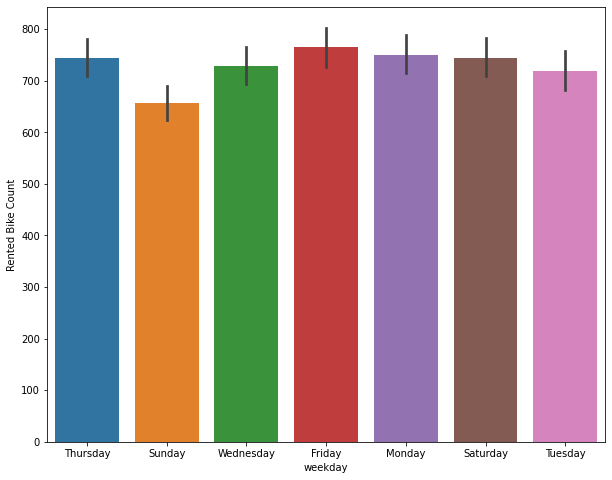

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['weekday'], y=data['Rented Bike Count'])
plt.show()

**4.3. Average bike rented in different seasons.**

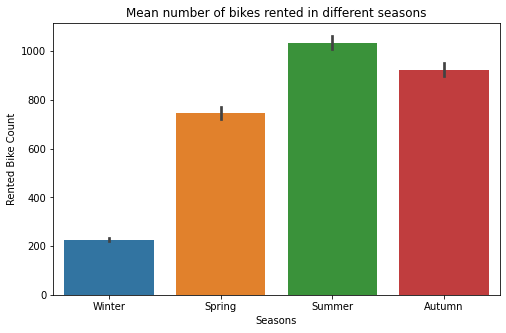

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=data['Seasons'], y=data['Rented Bike Count'])
plt.title('Mean number of bikes rented in different seasons')
plt.show()

**4.4. Average Bikes in season and working day.**

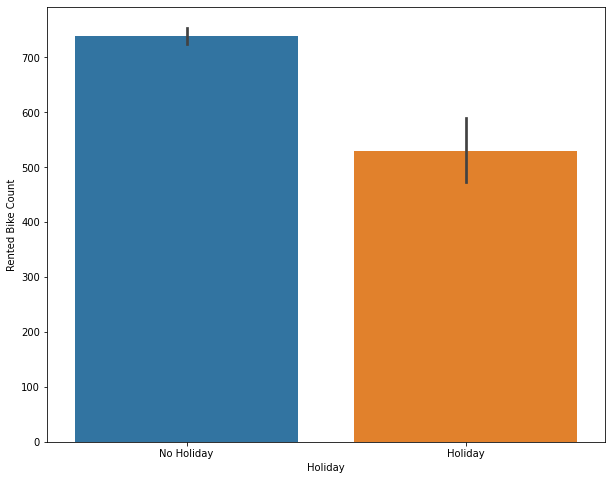

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['Holiday'], y=data['Rented Bike Count'])
plt.show()

**4.5. Rented bike count in each year.**

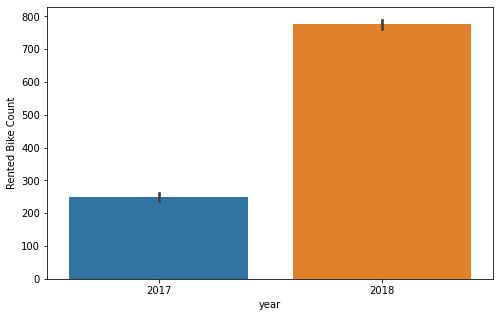

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=data['year'], y=data['Rented Bike Count'])
plt.show()

**4.6. Average bike count in each month.**

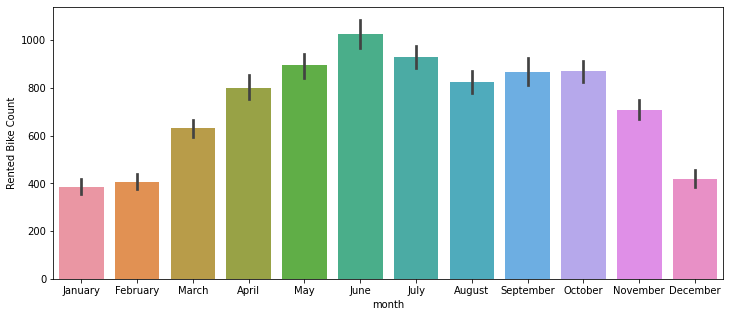

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['month'], y=data['Rented Bike Count'])
plt.show()

**4.7. Rented bike count each hour:-**

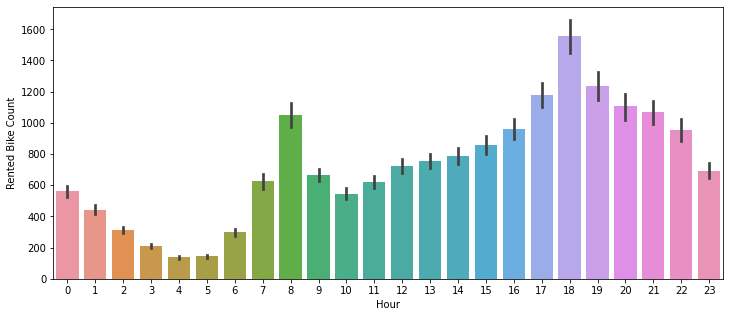

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x=data['Hour'], y=data['Rented Bike Count'])
plt.show()

**4.8. Correlation between each columns:-**

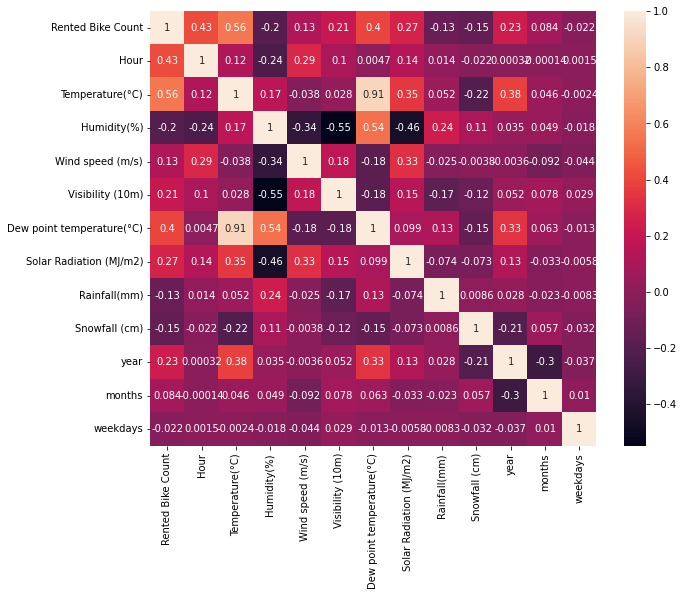

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

* Temperature and Dew point temperature is highly correlated and one need to be deleted.
* Humidity and visibility are negatively correlated.
* Solar Radiation and humidity are negatively correlated.
* Solar Radiation and temperature are positively correlated.


**4.9. Comparison on basis of season.**

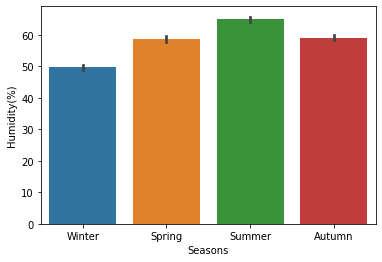

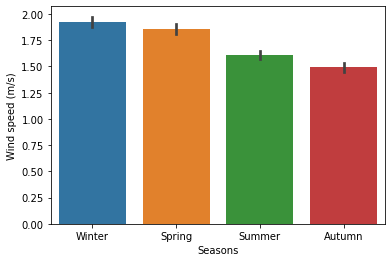

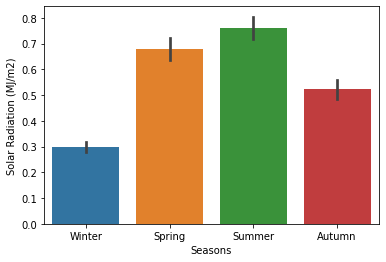

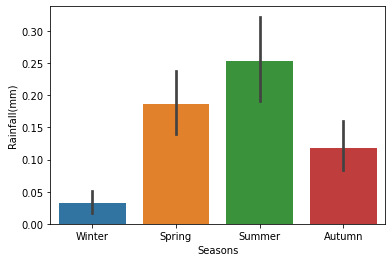

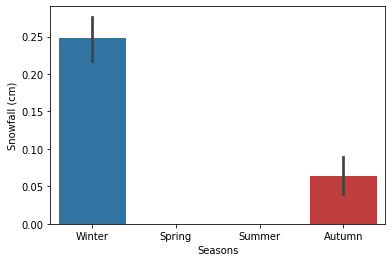

In [ ]:
col=['Humidity(%)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for i in col:
  sns.barplot(x='Seasons',y=i,data=data)
  plt.show()

**4.10. Comparison on basis of months.**

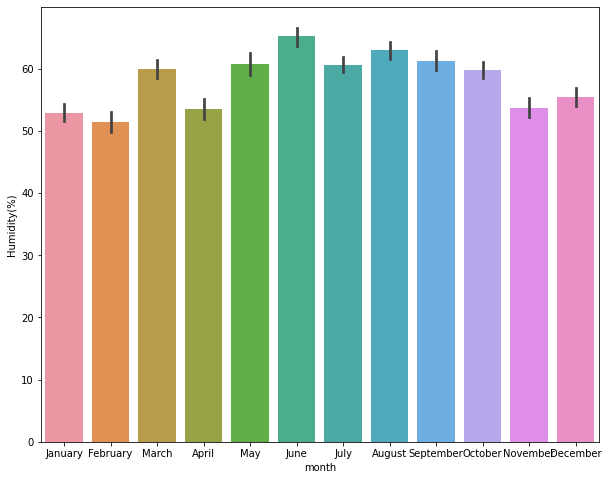

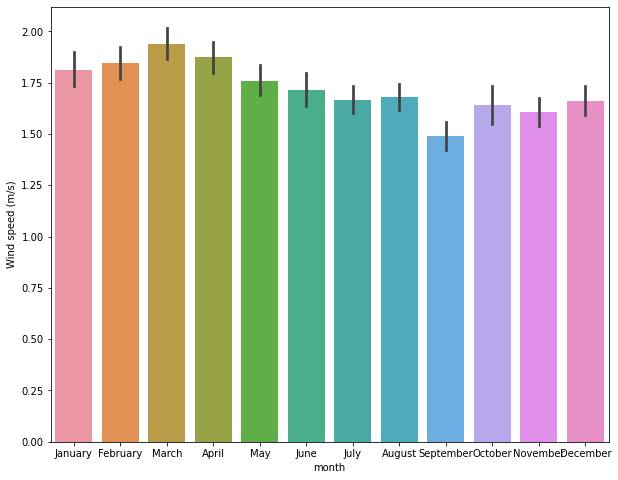

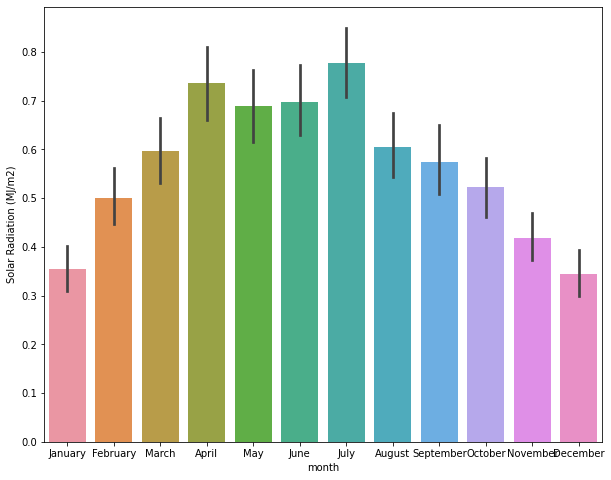

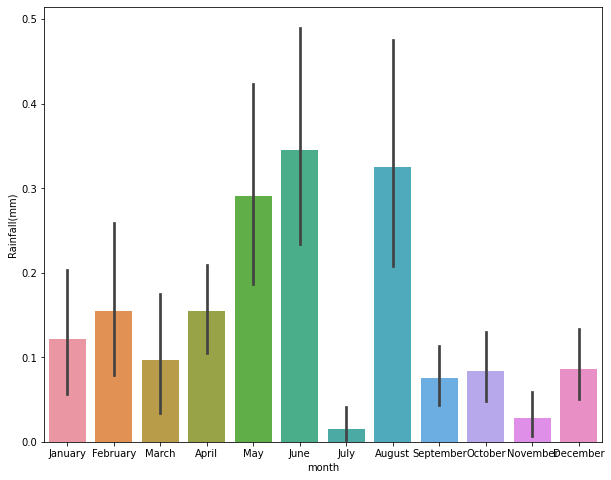

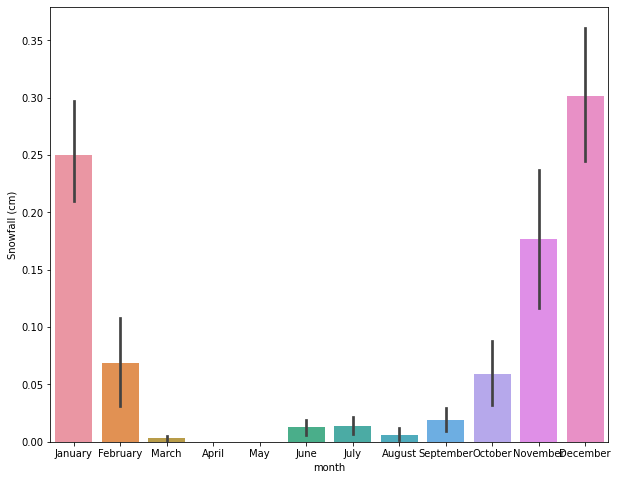

In [ ]:
col=['Humidity(%)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for i in col:
  plt.figure(figsize=(10,8))
  sns.barplot(x='month',y=i,data=data)
  plt.show()

# **5. Data Preparation:-**

**Distribution of the number of bikes rented**

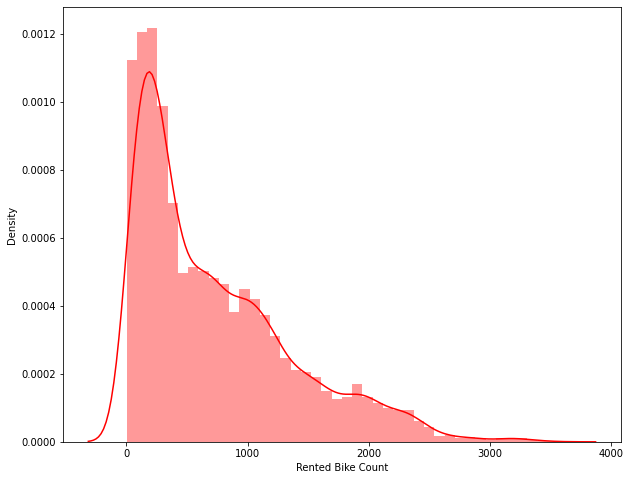

Skewness of the dataset:- 1.1397000550865888


In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(data['Rented Bike Count'],color='red')
plt.show()

#----------------------------------------------------------------------------

print('Skewness of the dataset:-',data['Rented Bike Count'].skew())

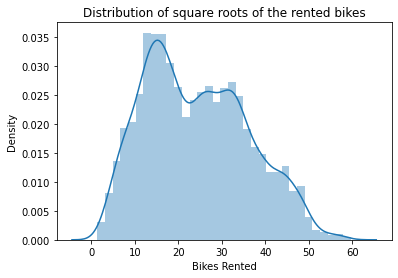

In [ ]:
# Treating skewness in dataset:-

data['Rented Bike Count']=np.sqrt(data['Rented Bike Count'])
sns.distplot(data['Rented Bike Count'])
plt.title('Distribution of square roots of the rented bikes')
plt.xlabel('Bikes Rented')
plt.show()

In [ ]:
# Creating one hot encoder for categorical columns:-

data= pd.get_dummies(data, columns=['Seasons', 'Holiday', 'year'], drop_first=True)

**Dropping columns:-**

In [ ]:
data.drop(['Dew point temperature(°C)', 'Wind speed (m/s)', 'Functioning Day','Hour','month','weekday'], axis=1, inplace=True)

In [ ]:
x = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, shuffle=True)

# **6. Data Modellling.**

In [ ]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('SVR', SVR()))
models.append(('Decision Tree Regressor', DecisionTreeRegressor()))
models.append(('Random Forest Regressor', RandomForestRegressor()))
models.append(('Gradient Boosting', GradientBoostingRegressor()))
models.append(('XGB Regressor', XGBRegressor()))

In [ ]:
scores = {}
for name, model in models:
  score = np.mean(cross_val_score(model, xtrain, ytrain, cv=10, scoring='r2'))
  scores[name]=score
print('R2 score of all the algorithms are:')
scores

[04:48:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:48:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'Decision Tree Regressor': 0.5501398112397566,
 'Gradient Boosting': 0.6884871484434856,
 'Lasso': 0.492358399675813,
 'Linear Regression': 0.5359256702193201,
 'Random Forest Regressor': 0.7695764970521303,
 'Ridge': 0.5359281303459862,
 'SVR': 0.10157746600824338,
 'XGB Regressor': 0.6878129221002258}

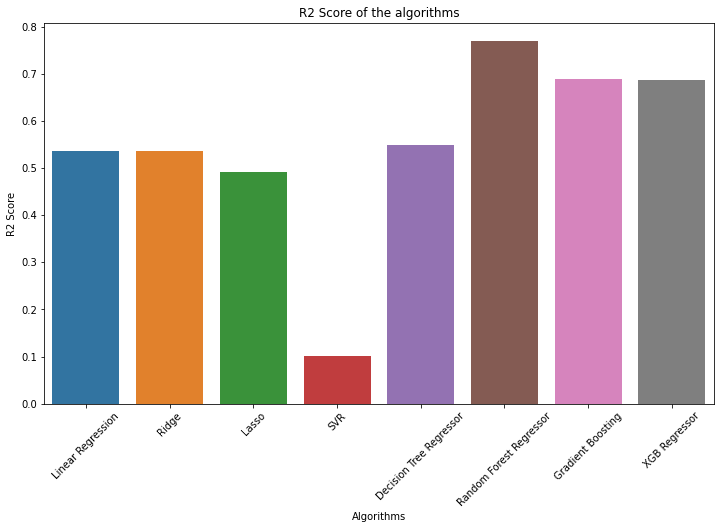

In [ ]:

plt.figure(figsize=(12,7))
sns.barplot(x=list(scores.keys()),y=list(scores.values()))
plt.xticks(rotation=45)
plt.title('R2 Score of the algorithms')
plt.xlabel('Algorithms')
plt.ylabel('R2 Score')
plt.show()

# 7.Hyperparameter Tuning

In [ ]:
def print_evaluation_metrics(pred_test,real_test):
  mse=mean_squared_error(real_test,pred_test)
  rmse=np.sqrt(mse)
  rscore=r2_score(real_test, pred_test)
  print('Mean Squared Error:- ',mse)
  print('Root Mean Squared Error:- ',rmse)
  print('R2 Score.- ',rscore)




**7.1. Random Forest Regressor.**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1700, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = range(2, 10)
min_samples_leaf = range(2, 10)
bootstrap = [True, False]

# Dictionary of all the hyper-parameters
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model=RandomForestRegressor()
# using Random Search CV to find the best parameters for the model
hyper_rf= RandomizedSearchCV(estimator=model, param_distributions=random_grid, cv = 10, verbose=2, random_state=42, scoring='r2')
hyper_rf.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=4, min_samples_split=9, n_estimators=100; total time= 

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'min_samples_leaf': range(2, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [100, 277, 455, 633,
                                                         811, 988, 1166, 1344,
                                                         1522, 1700]},
                   random_state=42, scoring='r2', verbose=2)

**7.1.1. Best parameter for Random Forest:-**

In [ ]:
hyper_rf.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 277}

**7.1.2. Best metric view of Random Forest after tuning.**

In [ ]:
model=RandomForestRegressor(bootstrap=True,max_depth=90,min_samples_leaf=2,min_samples_split=9,n_estimators=277)
model.fit(xtrain,ytrain)

ypred=model.predict(xtest)
print_evaluation_metrics(ypred,ytest)

Mean Squared Error:-  0.17935238948787768
Root Mean Squared Error:-  0.42350016468459334
R2 Score.-  0.9982491263022903


**7.2. Gradient Boosting Regressor.**

In [ ]:
model=GradientBoostingRegressor(random_state = 42)
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**7.2.1 Randomized SearcgCV**

In [ ]:
learning_rate = [0.1, 0.01, 1, 10]
max_depth = np.arange(2, 20)
max_leaf_nodes =np.arange(1, 24)
min_samples_leaf =np.arange(1, 14)
min_samples_split =np.arange(1, 10)
n_estimators = np.arange(100,1800 , 200)

# Create a dictionary of all the hyper-parameters
gradient_grid = {'learning_rate': learning_rate,
                'max_depth': max_depth,
                'max_leaf_nodes': max_leaf_nodes,
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split,
                'n_estimators': n_estimators}

hyper_gbr= RandomizedSearchCV(estimator=model, param_distributions=gradient_grid, cv = 10, verbose=2, random_state=42, scoring='r2')

# Fitting the model with the training dataset
hyper_gbr.fit(xtrain,ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END learning_rate=0.1, max_depth=7, max_leaf_nodes=1, min_samples_leaf=11, min_samples_split=6, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_leaf_nodes=1, min_samples_leaf=11, min_samples_split=6, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_leaf_nodes=1, min_samples_leaf=11, min_samples_split=6, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_leaf_nodes=1, min_samples_leaf=11, min_samples_split=6, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_leaf_nodes=1, min_samples_leaf=11, min_samples_split=6, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_leaf_nodes=1, min_samples_leaf=11, min_samples_split=6, n_estimators=1700; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, max_leaf_nodes=1, min_samples_leaf=11, min_samples_split=6, n_

RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'max_leaf_nodes': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 100,  300,  500,  700,  900, 1100, 1300, 1500, 1700])},
                   random_state=42, scoring='r2', verbose=2)

**7.2.2.  Best parameter for Random Forest:-**

In [ ]:
hyper_gbr.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'max_leaf_nodes': 17,
 'min_samples_leaf': 2,
 'min_samples_split': 7,
 'n_estimators': 1100}

In [ ]:
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=12,max_leaf_nodes=17,min_samples_leaf=2,min_samples_split=7,n_estimators=1100)
model.fit(xtrain,ytrain)
print_evaluation_metrics(ytest,ypred)

Mean Squared Error:-  6.457860078906471
Root Mean Squared Error:-  2.5412320002129816
R2 Score.-  0.9369570855011624


**7.3. XGB Regressor.**

In [ ]:
model_xgb = XGBRegressor(random_state = 42)

gamma = range(0,5)
learning_rate = [0.1, 0.01, 1, 10]
max_depth = range(3, 20)
n_estimators = range(100, 2000, 200)

xgboost_grid = {'gamma': gamma,
                'learning_rate': learning_rate,
                'max_depth': max_depth,
                'n_estimators': n_estimators}

**7.3.2. Hyperparameter Tuning for XGB Regressor.**

In [ ]:
gamma = range(0,5)
learning_rate = [0.1, 0.01, 1, 10]
max_delta_step = range(0, 10)
max_depth = range(3, 20)
min_child_weight = range(0,10)
n_estimators = range(100, 2000, 200)
reg_lambda = range(1,5)
xgboost_grid = {'gamma': gamma,
                'learning_rate': learning_rate,
                'max_delta_step': max_delta_step,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,
                'n_estimators': n_estimators,
                'reg_lambda': reg_lambda}

In [ ]:
model=XGBRegressor()
xgb_random = RandomizedSearchCV(estimator=model, param_distributions=xgboost_grid, cv = 10, verbose=2, random_state=42, scoring='r2')
xgb_random.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[06:01:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0, learning_rate=0.01, max_delta_step=7, max_depth=18, min_child_weight=8, n_estimators=1900, reg_lambda=3; total time=  37.2s
[06:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0, learning_rate=0.01, max_delta_step=7, max_depth=18, min_child_weight=8, n_estimators=1900, reg_lambda=3; total time=  36.8s
[06:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END gamma=0, learning_rate=0.01, max_delta_step=7, max_depth=18, min_child_weight=8, n_estimators=1900, reg_lambda=3; total time=  35.8s
[06:03:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV

RandomizedSearchCV(cv=10, estimator=XGBRegressor(),
                   param_distributions={'gamma': range(0, 5),
                                        'learning_rate': [0.1, 0.01, 1, 10],
                                        'max_delta_step': range(0, 10),
                                        'max_depth': range(3, 20),
                                        'min_child_weight': range(0, 10),
                                        'n_estimators': range(100, 2000, 200),
                                        'reg_lambda': range(1, 5)},
                   random_state=42, scoring='r2', verbose=2)

**7.3.3. Best parameter of XGB Regressor.**

In [ ]:
xgb_random.best_params_

{'gamma': 0,
 'learning_rate': 0.01,
 'max_delta_step': 7,
 'max_depth': 18,
 'min_child_weight': 8,
 'n_estimators': 1900,
 'reg_lambda': 3}

In [ ]:
xgb_model = XGBRegressor(gamma=0,
 learning_rate=0.01,
max_delta_step=7,
 max_depth=18,
 min_child_weight=8,
 n_estimators=1900,
 reg_lambda=3
                        )

# Fitting the training data using the best parameters of the model
xgb_model.fit(xtrain,ytrain)

ypred=xgb_model.predict(xtest)
print_evaluation_metrics(ytest,ypred)

[06:45:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error:-  5.329643032664892
Root Mean Squared Error:-  2.308601964970335
R2 Score.-  0.9531927366488483
